In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

This dataset contain the data about the Titanic and our model will predict who will survive or not using as_frame=True will set our dataset into dataframe

In [2]:
titanic_data=fetch_openml("titanic",version =1, as_frame=True)

In [3]:
df=titanic_data['data']

In [4]:
df['survived']=titanic_data['target']

We have loaded our data lets perform data analysis

In [5]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [6]:
df.shape

(1309, 14)

<Axes: xlabel='survived', ylabel='count'>

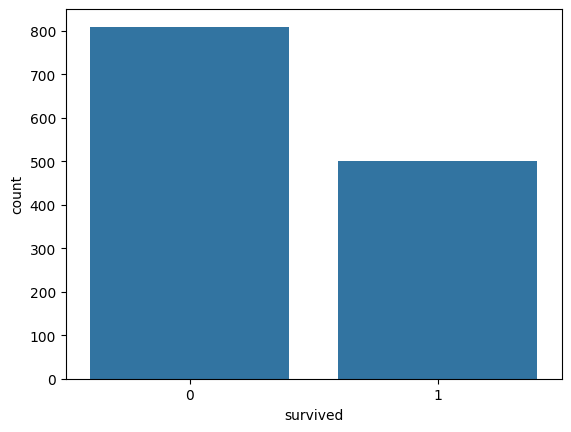

In [7]:
sns.countplot(x='survived',data=df)

Visualising survived or not based on sex

<Axes: xlabel='survived', ylabel='count'>

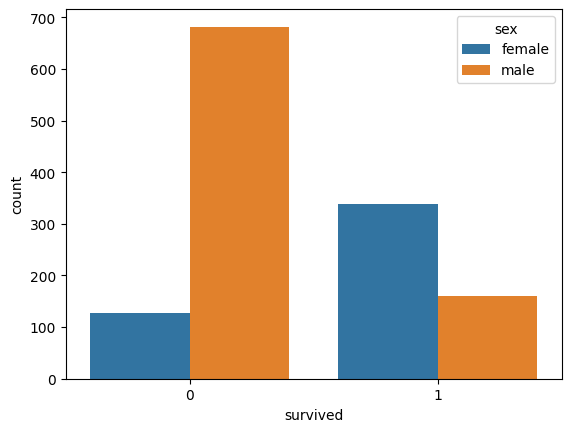

In [8]:
sns.countplot(x='survived',hue='sex',data=df)

<Axes: xlabel='survived', ylabel='count'>

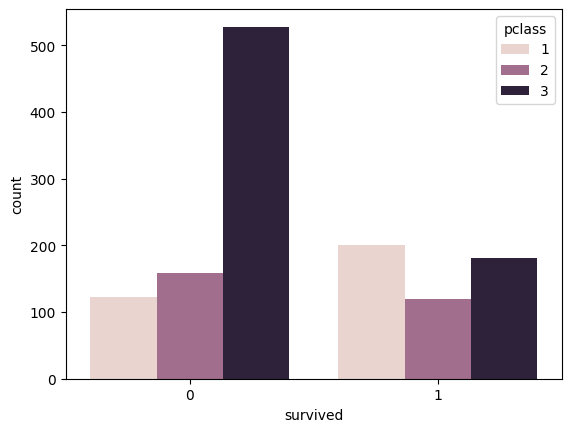

In [9]:
sns.countplot(x='survived',hue='pclass',data=df)

Lets see which age group people belong to

<Axes: ylabel='Frequency'>

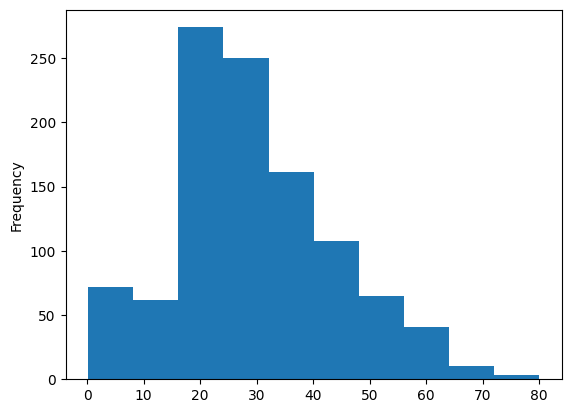

In [10]:
df['age'].plot.hist()

Lets see the information about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


Lets see the missing value

In [12]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


<Axes: title={'center': 'Missing Values in percentage'}, ylabel='Percentage'>

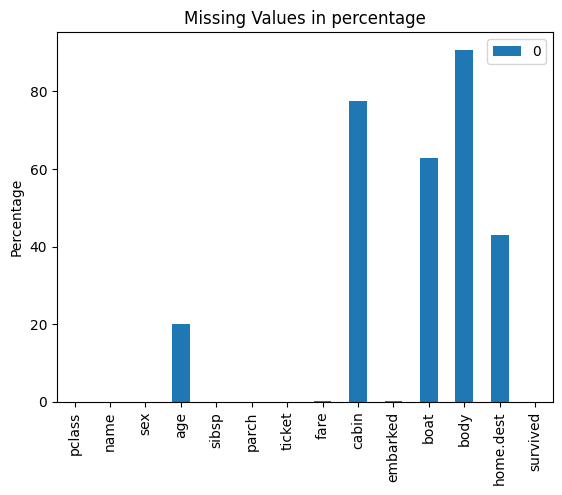

In [13]:
miss_val=pd.DataFrame(df.isnull().sum()/len(df) *100)
miss_val.plot(kind='bar',title='Missing Values in percentage',ylabel='Percentage')

sibsp is the number of sibling and spouse that is travelling with the particular person and the parch represent the number of children and parents travelling together. Lets merge this two column to see whether a person travelled alone or with the family

In [14]:
df['family']=df['sibsp']+df['parch']
df.loc[df['family']>0,'travelled_alone']=0
df.loc[df['family'] == 0,'travelled_alone']=1

In [15]:
df['family'].head()

,family
0,0
1,3
2,3
3,3
4,3


Now Since we have the family column with the feature engiinnering so we will drop the sibsp and parch column

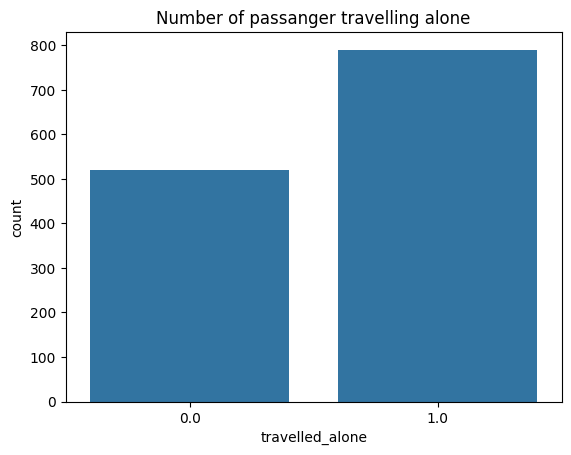

In [16]:
df.drop(['sibsp','parch'],axis=1,inplace=True)
sns.countplot(x='travelled_alone',data=df)
plt.title("Number of passanger travelling alone")
plt.show()

In [17]:
df.head()

,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0



Some feature is irrelevant for the output so we will drop it for example the name of the person will not help us to identify whether he will survive or not same goes to ticket destination

In [18]:
df.drop(['name','ticket','home.dest'],axis=1,inplace=True)

In [19]:
df.head()

,pclass,sex,age,fare,cabin,embarked,boat,body,survived,family,travelled_alone
0,1,female,29.0000,211.3375,B5,S,2,NaN,1,0,1.0
1,1,male,0.9167,151.5500,C22 C26,S,11,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,NaN,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,NaN,0,3,0.0


In [20]:
df.drop(['boat'],axis=1,inplace=True)

In [21]:
df.head()

,pclass,sex,age,fare,cabin,embarked,body,survived,family,travelled_alone
0,1,female,29.0000,211.3375,B5,S,NaN,1,0,1.0
1,1,male,0.9167,151.5500,C22 C26,S,NaN,1,3,0.0
2,1,female,2.0000,151.5500,C22 C26,S,NaN,0,3,0.0
3,1,male,30.0000,151.5500,C22 C26,S,135.0,0,3,0.0
4,1,female,25.0000,151.5500,C22 C26,S,NaN,0,3,0.0


There are few value in our dataset which is not computable such as descriptive word female , male can'not be understood by system for this we can use one hot encoding or get them a dummy values for this parameter
lets use dummy method

In [22]:
sex=pd.get_dummies(df['sex'],drop_first=True,dtype=float)
print(sex)

      male
0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
...    ...
1304   0.0
1305   0.0
1306   1.0
1307   1.0
1308   1.0

[1309 rows x 1 columns]


In [46]:
df['sex']=sex

In [47]:
  df.isnull().sum()

,0
pclass,0
sex,0
age,0
fare,0
survived,0
family,0
travelled_alone,0
Q,0
S,0


Lets use simple imputer function for this missing value we cant drop this column as it is important for the output

In [48]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(strategy='mean')

lets apply this imputer object to the age and fare feature

In [49]:
df['age']=imp_mean.fit_transform(df[['age']])
df['fare']=imp_mean.fit_transform(df[['fare']])

In [50]:
df.drop(['cabin','body'],axis=1,inplace=True)

KeyError: "['cabin', 'body'] not found in axis"

In [ ]:
df.isnull().sum()

Embarked has characteristic value

In [51]:
imp_freq=SimpleImputer(strategy='most_frequent')
df['embarked']=imp_freq.fit_transform(df[['embarked']]).ravel()

KeyError: "None of [Index(['embarked'], dtype='object')] are in the [columns]"

In [ ]:
df.isnull().sum()

In [52]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,0.0,29.0000,211.3375,1,0,1.0,0.0,1.0
1,1,1.0,0.9167,151.5500,1,3,0.0,0.0,1.0
2,1,0.0,2.0000,151.5500,0,3,0.0,0.0,1.0
3,1,1.0,30.0000,151.5500,0,3,0.0,0.0,1.0
4,1,0.0,25.0000,151.5500,0,3,0.0,0.0,1.0


In [53]:
embark=pd.get_dummies(df['embarked'],drop_first=True,dtype=float)
print(embark)

KeyError: 'embarked'

In [ ]:
df.drop(['embarked'],axis=1,inplace=True)
df=pd.concat([df,embark],axis=1)

In [54]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone,Q,S
0,1,0.0,29.0000,211.3375,1,0,1.0,0.0,1.0
1,1,1.0,0.9167,151.5500,1,3,0.0,0.0,1.0
2,1,0.0,2.0000,151.5500,0,3,0.0,0.0,1.0
3,1,1.0,30.0000,151.5500,0,3,0.0,0.0,1.0
4,1,0.0,25.0000,151.5500,0,3,0.0,0.0,1.0


In [57]:
X=df.drop(['survived'],axis=1)
X.head()

,pclass,sex,age,fare,family,travelled_alone,Q,S
0,1,0.0,29.0000,211.3375,0,1.0,0.0,1.0
1,1,1.0,0.9167,151.5500,3,0.0,0.0,1.0
2,1,0.0,2.0000,151.5500,3,0.0,0.0,1.0
3,1,1.0,30.0000,151.5500,3,0.0,0.0,1.0
4,1,0.0,25.0000,151.5500,3,0.0,0.0,1.0


In [58]:
y=df['survived']
y.head()

,survived
0,1
1,1
2,0
3,0
4,0


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [60]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(916, 8)
(393, 8)
(916,)
(393,)


In [61]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
pred=logmodel.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7989821882951654

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[204,  32],
       [ 47, 110]])